In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [76]:
file_path = r'E:\Data science\Data csv\DS Real world-projects\data set\3.1-data-sheet-guvi-courses.csv'
df = pd.read_csv(file_path)


In [77]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [78]:
df.tail()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments
3679,1234656.0,4 Week Rhythm Mastery,https://www.udemy.com/4-week-rhythm-mastery/,20.0,0.0,0.0,28.0,All Levels,0.01,2.500000,2017-07-05T16:07:44Z,Musical Instruments


In [79]:
df.shape

(3680, 12)

In [80]:
df.dtypes

course_id              float64
course_title            object
url                     object
price                  float64
num_subscribers        float64
num_reviews            float64
num_lectures           float64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [81]:
df.columns


Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


#### Data cleaning

In [83]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

<Axes: >

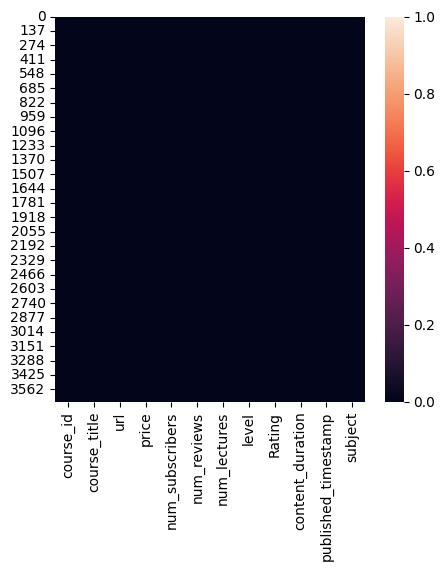

In [84]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [85]:
# Handle missing values (if any)
df.fillna(0, inplace=True)

# Convert categorical data to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['level', 'subject'])

In [86]:
df.isnull().sum()

course_id                           0
course_title                        0
url                                 0
price                               0
num_subscribers                     0
num_reviews                         0
num_lectures                        0
Rating                              0
content_duration                    0
published_timestamp                 0
level_0                             0
level_All Levels                    0
level_Beginner Level                0
level_Expert Level                  0
level_Intermediate Level            0
subject_0                           0
subject_Business Finance            0
subject_Graphic Design              0
subject_Musical Instruments         0
subject_Subject: Web Development    0
dtype: int64

<Axes: >

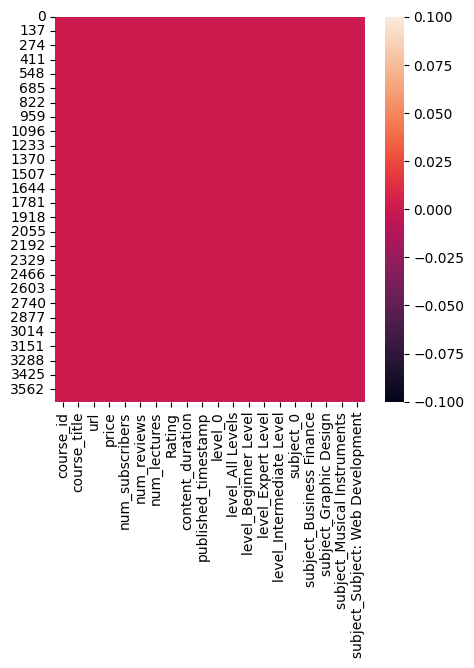

In [87]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [88]:
# Split data into features and target
X = df.drop(['course_title', 'url', 'Rating', 'published_timestamp'], axis=1)
y = df['Rating']


In [89]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [91]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.2541318568735931
Mean Squared Error: 0.09110140292399083
R-squared: 0.1541913566771993


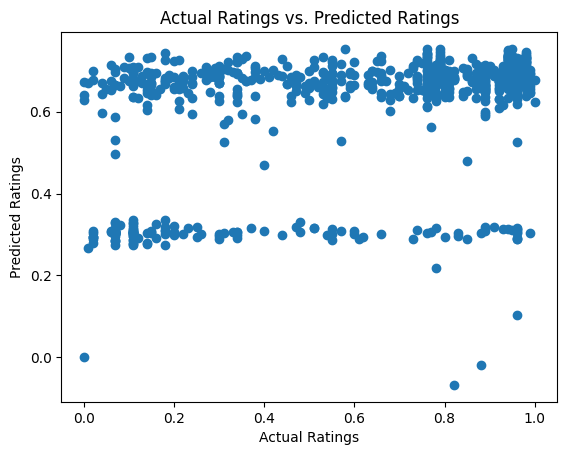

In [92]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual Ratings vs. Predicted Ratings")
plt.show()

In [93]:
# Save the model
joblib.dump(model, 'rating_prediction_model.pkl')

# To load the model for predictions
loaded_model = joblib.load('rating_prediction_model.pkl')
loaded_model 

LinearRegression()